# State of Data Science in US, Japan and Vietnam (Advanced Data Analysis & Visualization by Seaborn & Plotly)

In this project, I will analysis **a situation of data science in Japan and Vietnam with the comparision to the one of US**. I will use the data from [2018](https://www.kaggle.com/kaggle/kaggle-survey-2018) and [2019](https://www.kaggle.com/c/kaggle-survey-2019) Kaggle ML & DS Survery, and combine them into one bigger data set. The reason is that the number of data for Japan and Vietnam was very few if only one survey is used. Another reason is I found that most of respondents from Vietnam are students. Therefore, the number of participants who are actually data scientists is not enough to have a good view of the current sitation for data scientist career in Vietnam. I assume that the data in 2019 has a new update compared to the one in 2018. Therefore it is considered that there is **no duplicatation** in the data. In my opinion, this way maybe good enough to take a deepper understanding of the current situation for data science in both Japan and Vietam.

**This project aims to getting a better understanding of the current state various kind of information of data scientists in US, Japan and Vietnam.**

It will be divided into two parts.

[**Part I: General view of all participants in 2018 and 2019**](#p1)

- [1.1. Distribution by country](#1.1)
- [1.2. Title and number of participants](#1.2)
- [1.3. Distribution of participants by age and gender](#1.3)
- [1.4. Top 10 countries in the world which have the highest number of DS](#1.4)
    
 
[**Part II: Focusing on 3 countries: US, Japan and Vietnam**](#p2)

- [2.1. Distribution of participants in these countries by job titles](#2.1)
- [2.2. Focusing on data scientist](#2.2)
    - [2.2.1 Number of data scientists](#2.2.1)
    - [2.2.2 Age distribution of data scientists](#2.2.2)
    - [2.2.3 Education distribution](#2.2.3)
    - [2.2.4 Salary analysis](#2.2.4)
- [2.3 Learning platforms for data scientists in these three countries](#2.3)
- [2.4 Most used language for data scientists](#2.4)

## Let's begin our analysis !

In [1]:
#Start by importing some useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

import warnings
warnings.filterwarnings('ignore')

## Combine data in 2018 and 2019

In [2]:
responses_2018 = pd.read_csv("Data/2018_multipleChoiceResponses.csv")
responses_2019 = pd.read_csv("Data/2019_multiple_choice_responses.csv")
# responses_2018.info()
# responses_2019.info()

In [3]:
# This code will help us to see the question in details
#  for question, content in zip(responses_2018.columns,responses_2018.iloc[0,:]):
#     print(question,":",content)
#     print(100*"=")

# for question, content in zip(responses_2019.columns,responses_2019.iloc[0,:]):
#     print(question,":",content)
#     print(100*"=")

In [4]:
# I will create a new data which combine the data from 2018 and 2019
# The data will contain the information of "Age", "Gender", "Country", "Education", "Title", "Salary""Age", "Gender", "Country", "Education", "Title", "Salary"
column_names = ["Age", "Gender", "Country", "Education", "Title", "Salary"]
df_2018 = responses_2018.loc[:,["Q2","Q1","Q3","Q4","Q6","Q9"]]
df_2019 = responses_2019.loc[:,["Q1", "Q2", "Q3", "Q4", "Q5", "Q10"]]
df_2018.columns = column_names
df_2019.columns = column_names

#Drop the first rows which show the questions
df_2018.drop(0,axis=0,inplace=True)
df_2019.drop(0,axis=0,inplace=True)

df_combine = pd.concat([df_2018,df_2019]).reset_index()

df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43576 entries, 0 to 43575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      43576 non-null  int64 
 1   Age        43576 non-null  object
 2   Gender     43576 non-null  object
 3   Country    43576 non-null  object
 4   Education  42761 non-null  object
 5   Title      42007 non-null  object
 6   Salary     32682 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.3+ MB


<a id="p1"></a>
## Part 1: General view of all respondents in 2018 and 2019

<a id="1.1"></a>
### 1.1 Distribution of the respondents by country

In [5]:
# Take a quick check at all the country we have
df_combine["Country"].unique()

array(['United States of America', 'Indonesia', 'India', 'Colombia',
       'Chile', 'Turkey', 'Hungary', 'Ireland', 'France', 'Argentina',
       'Japan', 'Nigeria', 'Spain', 'Other',
       'Iran, Islamic Republic of...',
       'United Kingdom of Great Britain and Northern Ireland', 'Poland',
       'Kenya', 'Denmark', 'Netherlands', 'China', 'Sweden', 'Ukraine',
       'Canada', 'Australia', 'Russia', 'Austria', 'Italy', 'Mexico',
       'Germany', 'I do not wish to disclose my location', 'Singapore',
       'Brazil', 'Switzerland', 'South Africa', 'South Korea', 'Malaysia',
       'Hong Kong (S.A.R.)', 'Egypt', 'Tunisia', 'Portugal', 'Thailand',
       'Morocco', 'Pakistan', 'Czech Republic', 'Romania', 'Israel',
       'Philippines', 'Bangladesh', 'Belarus', 'Viet Nam', 'Belgium',
       'New Zealand', 'Norway', 'Finland', 'Greece', 'Peru',
       'Republic of Korea', 'Taiwan', 'Algeria', 'Saudi Arabia'],
      dtype=object)

In [6]:
# There are some countries which have quite long names, I will replace them by the ones which are shorter
df_combine["Country"] = df_combine["Country"].str.replace('United States of America',"United States")
df_combine["Country"] = df_combine["Country"].str.replace('United Kingdom of Great Britain and Northern Ireland',"United Kingdom")
df_combine["Country"] = df_combine["Country"].str.replace('Iran, Islamic Republic of...',"Iran")
df_combine["Country"] = df_combine["Country"].str.replace('Viet Nam',"Vietnam")
df_combine["Country"] = df_combine["Country"].str.replace('I do not wish to disclose my location',"No Info")

In [7]:
# Make a dict to count the number of participants in all countries
dict_countrty = { "Country": df_combine["Country"].value_counts().index, "Count": df_combine["Country"].value_counts().values }
df_country_count = pd.DataFrame(dict_countrty)

- India and US are two countries which have the highest number of participants. 
- For Japan, there are total 1270 repondents, and it is 272 participants from Vietnam. After combining two data sets, I think we have larger number of participants from JP and VN. 
Now, it is good to go further.

In [8]:
# Drawing a world map showed the distribution of the participants
data = [ dict(
            type = "choropleth",
            locations = df_country_count['Country'],
            locationmode = 'country names',
            z = df_country_count["Count"],
            colorbar = dict(autotick = False, tickprefix = "",title="Participant")
            )]

layout = dict(
            title="Distribution of all participants",
            geo = dict (
                    showframe = False,
                    showcoastlines = True,
                    width = 500,
                    height = 400)
                    )

world_map = dict( data=data, layout=layout)
iplot( world_map, validate=False)

<a id="1.2"></a>
### 1.2 Title and number of participants 

- Most of participants are student. It is nearly 9000. It means there are large number of student interested in data science field. It makes sense because Data Scientist is called as the sexist job of 21st century by Harvard Business Review. I also think data science is very challenging job and it has very attractive salary. That maybe explain why many student joined in the Kaggle platform to lean data science.
- There is about 8000 participants who actually reponse as data scientist.
- It is also quite interesting that, there are about 6000 participants who are software engineer. Kaggle maybe a good platform not only for student but also for software engineer to learn about data science and machine learning. 

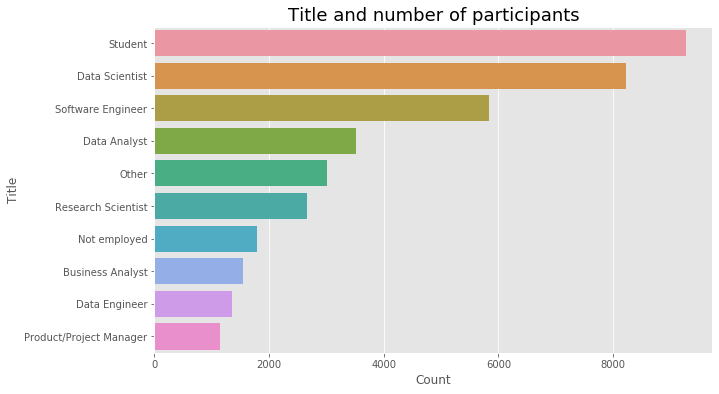

In [9]:
title = { "Title": df_combine["Title"].value_counts().index, "Count":df_combine["Title"].value_counts().values}
df_title = pd.DataFrame(title).sort_values("Count",ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y = df_title["Title"][:10], x = df_title["Count"][:10])
plt.title("Title and number of participants",fontsize=18)
plt.show()

<a id="1.3"></a>
### 1.3 Distribution of partcicipants by age and gender

- Most of participants are young, from 22 to 34. It makes sense because most of the title of participants are student (Bachelors, Masters and PhDs), and data science has just recently become a "hot trend". 
- The number of males is dominant compared to that of females. As an engineering, I think this ratio is relatively high compared to other engineering fields. I think the working enviroment in this industry might be not too boring.

In [10]:
# create df for the age distribution by gender
df_combine_age = df_combine[["Age","Gender"]].groupby(["Age","Gender"]).size().reset_index()
df_combine_age.columns = ["Age","Gender","Count"]

fig = px.bar(
                df_combine_age, x = "Age", y = "Count", color="Gender",
                title ="Age Distribution by Gender (All paricipants)",
                height = 400, width = 1000
            )
fig.show()

<a id="1.4"></a>
### 1.4 Top 10 countries in the world has the highest number of data scientist

- US has the highest number of respondents, and following is India. 
- After US, and India, Russia, Germany, France , Brazil, UK, Spain and Canada are top countries in the world with high number of respondents and thes countries have the respondents are relatively equivalent. 
- The portion of male/female is unbalanced. I suppose that it is following the same trend with other technical and engineering fields.

In [11]:
df_datascientist = df_combine[df_combine["Title"] == 'Data Scientist']
# Find top 10 countries with the highest number of ds
top10_countries = df_datascientist["Country"].value_counts()[:10].index
df_top10_countries = df_datascientist[df_datascientist["Country"].isin(top10_countries)][["Country","Gender"]]\
.groupby(["Country","Gender"]).size().reset_index()
df_top10_countries.columns = ["Country","Gender","Count"]
df_top10_countries = df_top10_countries.sort_values("Count",ascending=False)

In [12]:
fig = px.bar(
                df_top10_countries, x = "Country", y = "Count", color="Gender",
                title ="Age Distribution by Gender (All paricipants)",
                height = 400, width = 1000)
fig.show()

<a id="p2"></a>
## Part 2: Focusing on 3 countries: US, Japan and Vietnam

<a id="2.1"></a>
### 2.1. Distribution of participants in these countries by "Title"

- In US, the highest number of respondents is data scientist, and then the following titles are student and software engineer. In contrast to US, the number of data scientists is on the third place in both Japan and Vietnam. This means the proportion of data scientist in these two countries are relatively low compared to the one in US. 
- Data science is becoming an important part not only in IT sector but also in many fields of the industry. The number of data science is low in Japan and Vietnam. It means that there might be more demand for this career in these two countries.
- In Japan, the highest number of respondents are software engineering. It is good evidence for the high demand of the career related to data science, and many IT engineers are aiming to turn their jobs into data science.
- In Vietnam, many student is interesting in data science, and of course many software engineerings also want to learn about data science.

In [13]:
# Choose only data that contanins US, Vietnam and Japan information
df_US_JP_VN = df_combine[(df_combine["Country"] == "United States")|(df_combine["Country"] == "Japan") | (df_combine["Country"] == "Vietnam")]
df_US_JP_VN = df_US_JP_VN.groupby(["Title", "Gender", "Country"]).size().reset_index()
df_US_JP_VN.columns = ["Title", "Gender", "Country","Count"]
df_US_JP_VN = df_US_JP_VN.sort_values("Count",ascending=False)

In [14]:
xs_us_male = df_US_JP_VN[(df_US_JP_VN["Country"]=="United States")&(df_US_JP_VN["Gender"]=="Male")]["Title"].tolist()
ys_us_male = df_US_JP_VN[(df_US_JP_VN["Country"]=="United States")&(df_US_JP_VN["Gender"]=="Male")]["Count"].tolist()
xs_us_female = df_US_JP_VN[(df_US_JP_VN["Country"]=="United States")&(df_US_JP_VN["Gender"]=="Female")]["Title"].tolist()
ys_us_female = df_US_JP_VN[(df_US_JP_VN["Country"]=="United States")&(df_US_JP_VN["Gender"]=="Female")]["Count"].tolist()

xs_jp_male = df_US_JP_VN[(df_US_JP_VN["Country"]=="Japan")&(df_US_JP_VN["Gender"]=="Male")]["Title"].tolist()
ys_jp_male = df_US_JP_VN[(df_US_JP_VN["Country"]=="Japan")&(df_US_JP_VN["Gender"]=="Male")]["Count"].tolist()
xs_jp_female = df_US_JP_VN[(df_US_JP_VN["Country"]=="Japan")&(df_US_JP_VN["Gender"]=="Female")]["Title"].tolist()
ys_jp_female = df_US_JP_VN[(df_US_JP_VN["Country"]=="Japan")&(df_US_JP_VN["Gender"]=="Female")]["Count"].tolist()

xs_vn_male = df_US_JP_VN[(df_US_JP_VN["Country"]=="Vietnam")&(df_US_JP_VN["Gender"]=="Male")]["Title"].tolist()
ys_vn_male = df_US_JP_VN[(df_US_JP_VN["Country"]=="Vietnam")&(df_US_JP_VN["Gender"]=="Male")]["Count"].tolist()
xs_vn_female = df_US_JP_VN[(df_US_JP_VN["Country"]=="Vietnam")&(df_US_JP_VN["Gender"]=="Female")]["Title"].tolist()
ys_vn_female = df_US_JP_VN[(df_US_JP_VN["Country"]=="Vietnam")&(df_US_JP_VN["Gender"]=="Female")]["Count"].tolist()

In [15]:
fig = make_subplots(rows=3, cols=1,subplot_titles=('US','Japan', 'Vietnam'))
#US
fig.add_trace(
    go.Bar(x= xs_us_male,
            y = ys_us_male,
           name="US-Male", marker_color='crimson'),
    row=1, col=1)
fig.add_trace(
    go.Bar(x= xs_us_female,
            y = ys_us_female,
           name="US-Female", marker_color='blue'),
    row=1, col=1)

#Japan
fig.add_trace(
    go.Bar(x= xs_jp_male,
            y = ys_jp_male,
           name="JP-Male", marker_color='crimson'),
    row=2, col=1)
fig.add_trace(
    go.Bar(x= xs_jp_female,
            y = ys_jp_female,
           name="JP-Female", marker_color='blue'),
    row=2, col=1)

#Vietnam
fig.add_trace(
    go.Bar(x= xs_vn_male,
            y = ys_vn_male,
           name="VN-Male", marker_color='crimson'),
    row=3, col=1)
fig.add_trace(
    go.Bar(x= xs_vn_female,
            y = ys_vn_female,
           name="VN-Female", marker_color='blue'),
    row=3, col=1)

fig.update_layout(
    title_text="Titles of Respondents (US - Japan - Vietnam)",
    height=900, width=900, showlegend=True)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

<a id="2.2"></a>
### 2.2. Focusing on data scientist

In [16]:
# This data frame will be used to analyse the statistical information of data scientist in US, Japan and Vietnam
df_three_countries = df_datascientist[(df_datascientist["Country"] == 'United States')|(df_datascientist["Country"] == 'Japan')\
                        |(df_datascientist["Country"] == 'Vietnam')]

<a id="2.2.1"></a>
### 2.2.1 Number of data scientists

- Compared to US, the number of DS is very low in both Japan and Vietnam. The actual jobs with data scientits tiltle are only about 180, and 40 in Japan and Vietnam, respectively. These numbers are only 1/10 and 1/45 of the one in US. 
- Currently, skills in data science such as big data analysis, machine learning and deep learning are being highly appreciated. The few number of data scientist suggests that there will be a huge demand from now on in both Japan and Vietnam.
- The portion of female is relatively low in both Japan and Vietnam. Data science mainly have a technical background, so it is possible to explain why the number of female is small.

In [17]:
number_of_participants = df_three_countries[["Country","Gender"]].groupby(["Country","Gender"]).size().reset_index()
number_of_participants.columns = ["Country","Gender","Count"]
number_of_participants = number_of_participants.sort_values("Count",ascending=False)

fig = px.bar(number_of_participants, x="Country", y = "Count",color="Gender")
fig.update_layout(
    title_text='Number of data scientist participated in this survey by Gender',
    height=400, width=600)
fig.show()

<a id="2.2.2"></a>
### 2.2.2 Age distribution

- The distribution of age is relatively young in all three countries. However, the highest number of data scientists who are older than 60 belongs to the United States. This is explained by the fact that the United States is a leader in technology, therefore there are many people with much experience in this field compared to other two countries.
- In Vietnam, the age distribution is discrete because the number of data science is low. The number of young people (18-24) are majority. It makes sense because most of respondents in Vietnam are students.


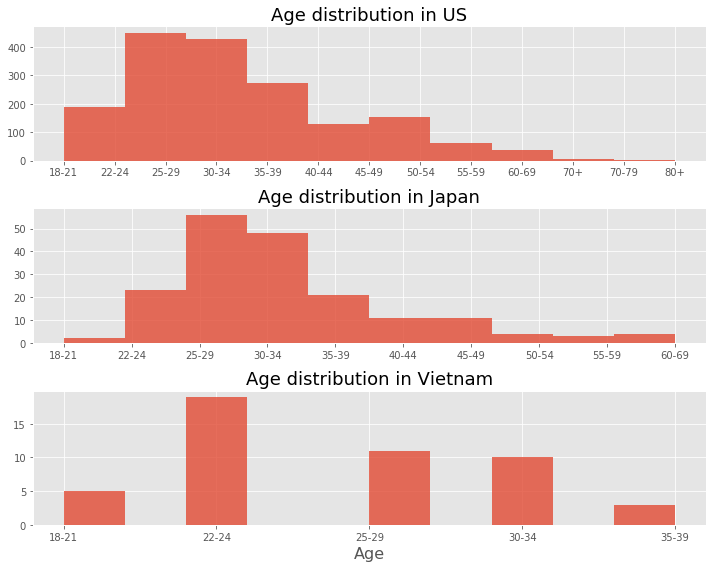

In [18]:
us_age = df_three_countries["Age"][df_three_countries["Country"]=="United States"].sort_values()
japan_age = df_three_countries["Age"][df_three_countries["Country"]=="Japan"].sort_values()
vietnam_age = df_three_countries["Age"][df_three_countries["Country"]=="Vietnam"].sort_values()

fig,ax = plt.subplots(3,1, figsize = (10,8))

plt.sca(ax[0])
us_age.hist(bins=10,alpha=0.8)
plt.title("Age distribution in US",fontsize=18)

plt.sca(ax[1])
japan_age.hist(bins=10,alpha=0.8)
plt.title("Age distribution in Japan",fontsize=18)

plt.sca(ax[2])
vietnam_age.hist(bins=10,alpha=0.8)
plt.title("Age distribution in Vietnam",fontsize=18)
plt.xlabel("Age",fontsize=16)
plt.tight_layout(); plt.show()

<a id="2.2.3"></a>
### 2.2.3 Education distribution

- In both US and Japan, the number of people with the Master's degree are dominant. The numbers account for more than a half of all respondents.
- It is about 30% of all respondents in US having Doctoral degree. It shows that the quality of data scientist is considerably high, and the competition might be tough to get a job as data scientist in US.
- Compared to US, it is about 18% of all respondents in Japan having Doctoral degree. This number significantly decrease in Vietnam with only about 8% of all respondents having Doctoral degree. 
- Compared to US and Japan, about 40% of all repondents is having Bachelor's degree in Vietnam. This implies that the resources for data science in Vietnam have not been developed as Japan and are far behind the US.

In [19]:
df_edu = df_three_countries[["Education", "Gender", "Country"]].groupby(["Education", "Gender", "Country"]).size().reset_index()
df_edu.columns = ["Education", "Gender", "Country","Count"]
df_edu = df_edu.sort_values("Count",ascending=False)

# Create a data frame for education in three countries
us_edu = df_edu[df_edu["Country"] == "United States"].groupby(["Education"]).agg("sum").reset_index()
japan_edu = df_edu[df_edu["Country"] == "Japan"].groupby(["Education"]).agg("sum").reset_index()
vietnam_edu = df_edu[df_edu["Country"] == "Vietnam"].groupby(["Education"]).agg("sum").reset_index()

In [20]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]], 
                    subplot_titles=('US', 'Japan','Vietnam'))

fig.add_trace(
    go.Pie(labels=us_edu["Education"], 
           values=us_edu["Count"],
           name = "U.S"), 
           1, 1) 

fig.add_trace(
    go.Pie(labels=japan_edu["Education"], 
           values=japan_edu["Count"],
           name = "Japan"), 
           1, 2) 

fig.add_trace(
    go.Pie(labels=vietnam_edu["Education"], 
           values=vietnam_edu["Count"],
           name = "Vietnam"), 
           1, 3) 

fig.update_traces(hoverinfo="label+value")
fig.update_layout(
    title_text="Education Level Comparison",
    height=400, width=1100)
fig.update_traces(hoverinfo='label+value+percent', textinfo='percent', textfont_size=14,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_traces(hole=.3)
fig.show()

<a id="2.2.4"></a>
### 2.2.4 Salary analysis

- The average salary for data scientist in US is higher than 100k. It is relatively high, and is ranked in a second place. It is only lower than Product/Project Manager.
- The salary for data scientist in Japan is not as high as the one in US, and is ranked in 9th place. The average salary of data scientist is equivalent to software engineer, and is about 40000 USD.
- This average salary of data scientitst in Vietnam is quite surprising. The salary of data scientist is the highest, and is more than 20000 USD. This number is about 1.4 times higher than Chief Officier, and two times higher than that of software engineer. This number is quite surprising and seems strange so I will check more specifically the salary distribution of data scientist in Vietnam.

In [21]:
df_salary = df_combine.dropna()
df_salary["SalaryTemp"] = df_salary["Salary"].str.replace("$0-999","0-999", regex=False)
df_salary["SalaryTemp"] = df_salary["SalaryTemp"].str.replace("> $500,000","500,000-499,999", regex=False)
df_salary["SalaryTemp"] = df_salary["SalaryTemp"].str.replace("300,000-500,000","300,000-499,999", regex=False)
df_salary["SalaryTemp"] = df_salary["SalaryTemp"].str.replace(",","", regex=False)

In [22]:
# Calculate the salary mean
df_salary["SalaryLowLimit"] = df_salary["SalaryTemp"].str.split('-', expand=True)[0]
df_salary["SalaryLowLimit"] = pd.to_numeric(df_salary["SalaryLowLimit"], errors='coerce')
df_salary["SalaryUpLimit"] = df_salary["SalaryTemp"].str.split('-', expand=True)[1]
df_salary["SalaryUpLimit"] = pd.to_numeric(df_salary["SalaryUpLimit"], errors='coerce')+1
df_salary["SalaryMean"] = (df_salary["SalaryLowLimit"]+df_salary["SalaryUpLimit"])/2
df_salary = df_salary.dropna()

# Have a quick look at the salary dataframe
df_salary.head()

,index,Age,Gender,Country,Education,Title,Salary,SalaryTemp,SalaryLowLimit,SalaryUpLimit,SalaryMean
1,2,30-34,Male,Indonesia,Bachelor’s degree,Other,"10-20,000",10-20000,10.0,20001.0,10005.5
2,3,30-34,Female,United States,Master’s degree,Data Scientist,"0-10,000",0-10000,0.0,10001.0,5000.5
4,5,22-24,Male,India,Master’s degree,Data Analyst,"0-10,000",0-10000,0.0,10001.0,5000.5
6,7,35-39,Male,Chile,Doctoral degree,Other,"10-20,000",10-20000,10.0,20001.0,10005.5
7,8,18-21,Male,India,Master’s degree,Other,"0-10,000",0-10000,0.0,10001.0,5000.5


In [23]:
# Create a df for salary in three countries
us_salary = df_salary[df_salary["Country"]=="United States"][["Title", "SalaryMean"]].groupby(["Title"], as_index=False).mean().sort_values("SalaryMean", ascending=False)
jp_salary = df_salary[df_salary["Country"]=="Japan"][["Title", "SalaryMean"]].groupby(["Title"], as_index=False).mean().sort_values("SalaryMean", ascending=False)
vn_salary = df_salary[df_salary["Country"]=="Vietnam"][["Title", "SalaryMean"]].groupby(["Title"], as_index=False).mean().sort_values("SalaryMean", ascending=False)

fig = make_subplots(rows=3, cols=1, subplot_titles=('US', 'Japan', 'Vietnam'))
mc_c1=["crimson"]*20
mc_c1[1] = "lime"

mc_c2=["crimson"]*20
mc_c2[8] = "lime"

mc_c3=["crimson"]*20
mc_c3[0] = "lime"

#US
fig.add_trace(
    go.Bar(x= us_salary["Title"],
            y = us_salary["SalaryMean"],
           marker_color=mc_c1),
    row=1, col=1)

#Japan
fig.add_trace(
    go.Bar(x= jp_salary["Title"],
            y = jp_salary["SalaryMean"],
           marker_color=mc_c2),
    row=2, col=1)

#Vietnam
fig.add_trace(
    go.Bar(x= vn_salary["Title"],
            y = vn_salary["SalaryMean"],
           marker_color=mc_c3),
    row=3, col=1)

fig.update_layout(
    title_text="Data Scientist Salary (Japan-Vietnam)",
    height=900, width=900, showlegend=False)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6) 
                 
fig.show()

- In Vietnam, there are relatively many outliers when looking at the below box plot for the average salary. These salary may not be true, or possible that some certain data scientists have been paid very high salaries. The reason may be due to the scarcity of high quality data scientits.
- Most data scientist is paid about 5000 or 10000 USD. This numbers implies that the data science in general is paid not considerably high but the salary is highly dependent on the ability of the candidate.

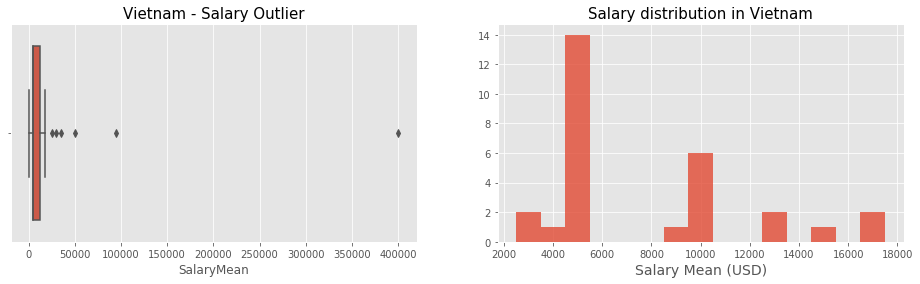

In [24]:
fig,ax = plt.subplots(1,2, figsize = (16,4))

plt.sca(ax[0])
sns.boxplot(df_salary[ (df_salary["Country"] == "Vietnam") & (df_salary["Title"] == "Data Scientist") ]["SalaryMean"])
plt.title("Vietnam - Salary Outlier",fontsize=15)

# The minimum wage in Vietnam is 2,000 USD. So the number which is < 2,000U SD and > 150,000USD might be not true
# The outlier is greater than 20000 USD
vn_salary_dis = df_salary[ (df_salary["Country"] == "Vietnam") & (df_salary["Title"] == "Data Scientist")
                        & (df_salary["SalaryMean"] > 2000) & (df_salary["SalaryMean"] < 20000) ]["SalaryMean"]

plt.sca(ax[1])
vn_salary_dis.hist(bins=15,alpha=0.8)
plt.title("Salary distribution in Vietnam",fontsize=15)
plt.xlabel("Salary Mean (USD)",fontsize=14)
plt.show()

 <a id="2.3"></a>
 ### 2.3 Learning platform

- In US, the most popular platform for learning data science is Blog (e.g. Towards Data Science, Medium, Analytics Vidhya, KDnuggets and etc) and then following is Kaggle. In Japan and Vietnam, the most popular platform is Kaggle. In my opinion, it might be due to the language barrier. Most of popular blogs for data science are written in English (listed above), and it somehow affect the learners. However, of course Kaggle is great platform to learn data science, and therfore it is on the sencond place in US and rank at first in both Vietnam and Japan.
- Twitter (learning from data sciecne influencers) and Youtube channel (e.g.Cloud AI Adventures, and Siraj Raval) are also very useful places for learners.

In [25]:
# Let's take a quick look at the learning platform in kaggle survey 2019
learning_platform_questions = ["Q12_Part_1","Q12_Part_2","Q12_Part_3","Q12_Part_4","Q12_Part_5","Q12_Part_6",
                               "Q12_Part_7","Q12_Part_8","Q12_Part_9","Q12_Part_10","Q12_Part_11" ]
for question,content in zip(responses_2019[learning_platform_questions].columns,responses_2019[learning_platform_questions].iloc[0,:]):
    print(question," : ",content)
    print(100*"=")

Q12_Part_1  :  Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)
Q12_Part_2  :  Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Hacker News (https://news.ycombinator.com/)
Q12_Part_3  :  Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, r/datascience, etc)
Q12_Part_4  :  Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)
Q12_Part_5  :  Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, etc)
Q12_Part_6  :  Who/what are your favorite media sources that report on data science topics? (Select all that apply) -

In [26]:
# Create a new data frame which contains Q3: country and Q12: learning platforms
new_df_conlumns =  ["Q3","Q12_Part_1","Q12_Part_2","Q12_Part_3","Q12_Part_4","Q12_Part_5","Q12_Part_6",
                               "Q12_Part_7","Q12_Part_8","Q12_Part_9","Q12_Part_10","Q12_Part_11" ]
new_df_comlumns_names = ["Country",'Twitter','Hacker News','Reddit','Kaggle','Course Forums','YouTube','Podcasts',
                      'Blogs','Journal Publications','Slack','Other']

df_learning_platform = responses_2019[new_df_conlumns].drop(0,axis=0)
df_learning_platform.columns = new_df_comlumns_names

df_learning_platform = df_learning_platform.reset_index()
df_learning_platform["Country"] = df_learning_platform["Country"].str.replace('United States of America',"United States")
df_learning_platform["Country"] = df_learning_platform["Country"].str.replace('Viet Nam',"Vietnam")

conditions = (df_learning_platform["Country"] == "United States")|(df_learning_platform["Country"] == "Japan")|(df_learning_platform["Country"] == "Vietnam")
df_platform = df_learning_platform[conditions]

In [27]:
us_data = {}
for name in new_df_comlumns_names[1:]:
    us_data[name] = df_platform[df_platform["Country"] =="United States"][name].value_counts().sum()
us_platforms = pd.DataFrame(us_data.items(),columns = ["Platforms","Count"])

jp_data = {}
for name in new_df_comlumns_names[1:]:
    jp_data[name] = df_platform[df_platform["Country"] =="Japan"][name].value_counts().sum()
jp_platforms = pd.DataFrame(jp_data.items(),columns = ["Platforms","Count"])   

vn_data = {}
for name in new_df_comlumns_names[1:]:
    vn_data[name] = df_platform[df_platform["Country"] =="Vietnam"][name].value_counts().sum()
vn_platforms = pd.DataFrame(vn_data.items(),columns = ["Platforms","Count"])   

# Visualize the data
fig=go.Figure(data=[
    go.Bar(x=us_platforms['Platforms'],y=us_platforms['Count'],name='US'),
    go.Bar(x=jp_platforms['Platforms'],y=jp_platforms['Count'],name='Japan'),
    go.Bar(x=vn_platforms['Platforms'],y=vn_platforms['Count'],name='Vietnam'),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    title_text="Learning Platforms (US - Japan - Vietnam)",
    height=500, width=900, showlegend=True)
fig.show()

In [28]:
fig=go.Figure(data=[
    go.Bar(x=jp_platforms['Platforms'],y=jp_platforms['Count'],name='Japan'),
    go.Bar(x=vn_platforms['Platforms'],y=vn_platforms['Count'],name='Vietnam'),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    title_text="Learning Platforms in Japan and Vietnam)",
    height=500, width=900, showlegend=True)
fig.show()

 <a id="2.4"></a>
### 2.4 Popular programming language

- Python and SQL are two most popular programming languages for data scietitsts, and of course for people who want to make a progress into this field.
- R is on 3rd place in Japan and US and in 5th place in Vietnam. In Vietnam, R might be not popular as C++, and Java.
- In my oppinion, if you would like to seek for a job in data science or make a carrer change in this field, start with Python and learn some SQL.

In [29]:
lang_questions = ["Q18_Part_1","Q18_Part_2","Q18_Part_3","Q18_Part_4","Q18_Part_5","Q18_Part_6",
                               "Q18_Part_7","Q18_Part_8","Q18_Part_9","Q18_Part_10","Q18_Part_11","Q18_Part_12" ]
for question,content in zip(responses_2019[lang_questions].columns,responses_2019[lang_questions].iloc[0,:]):
    print(question," : ",content)
    print(100*"=")

Q18_Part_1  :  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
Q18_Part_2  :  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
Q18_Part_3  :  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL
Q18_Part_4  :  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C
Q18_Part_5  :  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++
Q18_Part_6  :  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java
Q18_Part_7  :  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript
Q18_Part_8  :  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - TypeScript
Q18_Part_9  :  Wha

In [30]:
# Create a new data frame which contains Q3: country and Q18: programming languages
new_df_conlumns =  ["Q3","Q18_Part_1","Q18_Part_2","Q18_Part_3","Q18_Part_4","Q18_Part_5","Q18_Part_6",
                               "Q18_Part_7","Q18_Part_8","Q18_Part_9","Q18_Part_10","Q18_Part_11","Q18_Part_12"]
new_df_comlumns_names = ['Country','Python','R','SQL','C','C++','Java','Javascript',
                      'TypeScript','Bash','MATLAB','None','Other']

In [31]:
df_lang = responses_2019[new_df_conlumns].drop(0,axis=0)
df_lang.columns = new_df_comlumns_names
df_lang = df_lang.reset_index()

df_lang["Country"] = df_lang["Country"].str.replace('United States of America',"United States")
df_lang["Country"] = df_lang["Country"].str.replace('Viet Nam',"Vietnam")

conditions = (df_lang["Country"] == "United States")|(df_lang["Country"] == "Japan")|(df_lang["Country"] == "Vietnam")
df_lang = df_lang[conditions]

In [32]:
us_data_lang = {}
for name in new_df_comlumns_names[1:]:
    us_data_lang[name] = df_lang[df_lang["Country"] =="United States"][name].value_counts().sum()
us_data_lang = pd.DataFrame(us_data_lang.items(),columns = ["Languages","Count"])

jp_data_lang = {}
for name in new_df_comlumns_names[1:]:
    jp_data_lang[name] = df_lang[df_lang["Country"] =="Japan"][name].value_counts().sum()
jp_data_lang = pd.DataFrame(jp_data_lang.items(),columns = ["Languages","Count"])

vn_data_lang = {}
for name in new_df_comlumns_names[1:]:
    vn_data_lang[name] = df_lang[df_lang["Country"] =="Vietnam"][name].value_counts().sum()
vn_data_lang = pd.DataFrame(vn_data_lang.items(),columns = ["Languages","Count"])

In [33]:
fig=make_subplots(rows=1,cols=3,
                 specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"}]]
                 ,subplot_titles=('US',"Japan","Vietnam"))

fig.add_trace(go.Pie(labels=us_data_lang['Languages'],values=us_data_lang['Count'],name='US'),row=1,col=1)

fig.add_trace(go.Pie(labels=jp_data_lang['Languages'],values=jp_data_lang['Count'],name='Japan'),row=1,col=2)

fig.add_trace(go.Pie(labels=vn_data_lang['Languages'],values=vn_data_lang['Count'],name='Vietnam'),row=1,col=3)

fig.update_layout(
    title_text = "Popular programming languages",
    height=500,width=900, 
    showlegend=True)
fig.update_traces(hoverinfo='label+value+percent', textinfo='percent', textfont_size=12,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_traces(hole=.4)# to create donut like pie chart
fig.show()

# Conclusion

In total, 9343 participants who come from US, Japan and Vietnam were analyzed. The results obtained from the analysis were summarized as followed.

(1) A number and proportion of data scientist to other career title in Japan and Vietnam are much lower than those of US. The field of data science is gradually proving its importance with many practical applications with the focus of Machine Leaning and Deep Learning. The low number and proportion of data scientist show a potential demand for this career in these two countries.

(2) The age of data scientists in all three countries are relatively young. However, US shows the dominant of the number of experienced data scientist with wider age range of respondents.

(3) The education of data scientist in US is considerably high with more than 80% of respondents having master and doctoral degree. These number drop considerably to about 70% and 45% in Japan and Vietnam, respectively.

(4) The average salary for data scientist in US is very high (~100k USD), and ranks in a second place. Japan has lower salary for data scientist and it is relatively same to other IT careers. The salary of data scientist in Vietnam is generally high, and highly depends on the ability of the candidate.

(5) The most popular platform to learn data science is Blog and Kaggle. In Japan and Vietnam, due to the language barrier, many people prefer more practical approach using Kaggle than reading a blog.